<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tools" data-toc-modified-id="Tools-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tools</a></span></li><li><span><a href="#$d_{\infty}$-Circle-(approximately)" data-toc-modified-id="$d_{\infty}$-Circle-(approximately)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>$d_{\infty}$ Circle (approximately)</a></span></li><li><span><a href="#d1---Vitruvian-Man" data-toc-modified-id="d1---Vitruvian-Man-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>d1 - Vitruvian Man</a></span></li><li><span><a href="#d2---Dumbbell" data-toc-modified-id="d2---Dumbbell-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>d2 - Dumbbell</a></span></li><li><span><a href="#d3---Triangle" data-toc-modified-id="d3---Triangle-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>d3 - Triangle</a></span></li><li><span><a href="#d4---Square" data-toc-modified-id="d4---Square-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>d4 - Square</a></span></li><li><span><a href="#d6---Hexagon" data-toc-modified-id="d6---Hexagon-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>d6 - Hexagon</a></span></li><li><span><a href="#c1---Random-Pattern-(asymmetric)" data-toc-modified-id="c1---Random-Pattern-(asymmetric)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>c1 - Random Pattern (asymmetric)</a></span></li><li><span><a href="#c2--" data-toc-modified-id="c2---9"><span class="toc-item-num">9&nbsp;&nbsp;</span>c2 -</a></span></li><li><span><a href="#c3--" data-toc-modified-id="c3---10"><span class="toc-item-num">10&nbsp;&nbsp;</span>c3 -</a></span></li><li><span><a href="#c4--" data-toc-modified-id="c4---11"><span class="toc-item-num">11&nbsp;&nbsp;</span>c4 -</a></span></li><li><span><a href="#c6--" data-toc-modified-id="c6---12"><span class="toc-item-num">12&nbsp;&nbsp;</span>c6 -</a></span></li></ul></div>

Here we manually create some motifs to use as colloidal components

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Tools

In [2]:
import copy
def compress(coords): # Compress into [0,1] window to make it easier on Tactile
    compressed = copy.copy(coords)
    bb = np.min(compressed, axis=0)
    compressed -= bb

    bb = np.max(compressed, axis=0)
    compressed = compressed/bb
    
    return compressed

def plot_motif(coords, types): # Visualize to make sure it appears correct
    types = np.array(types)
    plt.figure()
    for i,t in enumerate(np.unique(types)):
        mask = types == t
        plt.plot(coords[mask,0], coords[mask,1], marker='o', lw=0, color='C{}'.format(i))
    _ = plt.gca().axis('equal')
    
def save(coords, types, symmetry, filename): # Save to JSON file
    info = {
        "symmetry": symmetry,
        "coords": coords.tolist(),
        "types": types,
        "theta": 0.0
    }
    json.dump(info, open(filename, 'w'), indent=4)
    
def distance(x, y, x0, y0):
    return np.sqrt(np.sum((x-x0)**2 + (y-y0)**2))

def rotation(theta):
    R = np.array(
        [[np.cos(2*theta), np.sin(2*theta)],
        [np.sin(2*theta), -np.cos(2*theta)]]
    )
    return R

# $d_{\infty}$ Circle (approximately)

In [3]:
N = 20
x, y = np.meshgrid(np.arange(N), np.arange(N), sparse=False, indexing='xy')

inner = (N-1)/2.
outer = N/2.

coords = []
for x_, y_ in list(zip(x.flatten(), y.flatten())):
    if (inner < distance(x_, y_, (N-1)/2, (N-1)/2) < outer):
        coords.append([x_, y_])
coords = np.array(coords)
types = ['A']*len(coords)

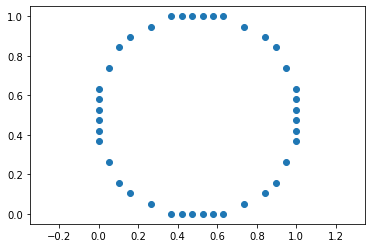

In [4]:
coords = compress(coords)
plot_motif(coords, types)

In [5]:
save(coords, types, "d_inf", "d_inf_circle.json")

# d1 - Vitruvian Man

In [6]:
coords = [
    [0, 0],
    [0, -1],
    [-1, -1],
    [-2, -1],
    [-2, -2],
    [1, -1],
    [2, -1],
    [2, -2],
    [0, -2],
    [0, -3],
    [-1, -3],
    [-1, -4],
    [1, -3],
    [1, -4]
]

coords = np.array(coords)
types = ['A']*len(coords)

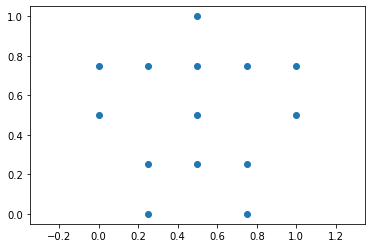

In [7]:
coords = compress(coords)
plot_motif(coords, types)

In [8]:
save(coords, types, "d_1", "d_1_vitruvian.json")

# d2 - Dumbbell

In [9]:
N = 12
x, y = np.meshgrid(np.arange(N), np.arange(N), sparse=False, indexing='xy')

inner = (N-1)/2.
outer = N/2.

coords = []
for x_, y_ in list(zip(x.flatten(), y.flatten())):
    if (inner < distance(x_, y_, (N-1)/2, (N-1)/2) < outer):
        coords.append([x_, y_])
coords = np.array(coords)
coords = np.vstack((coords, coords + np.array([N, 0])))

types = ['A']*len(coords)

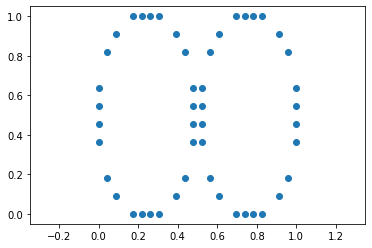

In [10]:
coords = compress(coords)
plot_motif(coords, types)

In [11]:
save(coords, types, "d_2", "d_2_dumbbell.json")

# d3 - Triangle

In [12]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(l1, rotation(np.pi/6.))
l3 = np.matmul(l1, rotation(-np.pi/6.)) + np.array([1/2., np.sqrt(3.0)/2.*1])

In [13]:
coords = np.vstack((l1[:-1,:], l2[1:,:], l3[1:,:]))
types = ['A']*len(coords)

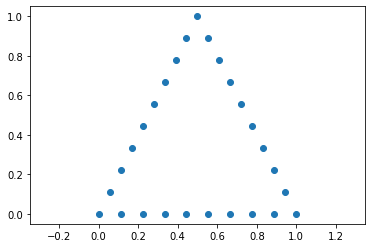

In [14]:
coords = compress(coords)
plot_motif(coords, types)

In [15]:
save(coords, types, "d_3", "d_3_triangle.json")

# d4 - Square

In [16]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(l1, rotation(np.pi/4.))
l3 = l1 + np.array([0, 1])
l4 = copy.copy(l2) + np.array([1, 0])

coords = np.vstack((l1, l2[1:], l3[1:], l4[1:-1,:]))
types = ['A']*len(coords)

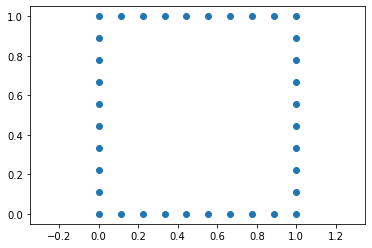

In [17]:
coords = compress(coords)
plot_motif(coords, types)

In [18]:
save(coords, types, "d_4", "d_4_square.json")

# d6 - Hexagon

In [19]:
N = 10
l1 = np.array(list(zip(np.linspace(0, 1, N), [0]*N)))
l2 = np.matmul(l1, rotation(-2*np.pi/3.))
l3 = np.matmul(l1, rotation(-4*np.pi/3.))
l3 += (l2[-1] - l3[-1])
l4 = copy.copy(l1) + l3[0]
l5 = np.matmul(l3, np.array([[-1, 0],[0, 1]])) + np.array([1.0, 0])
l6 = np.matmul(l2, np.array([[-1, 0],[0, 1]])) + np.array([1.0, 0])

coords = np.vstack((l1[1:], l2[:-1], l3[1:], l4[:-1], l5[:-1], l6[1:]))
types = ['A']*len(coords)

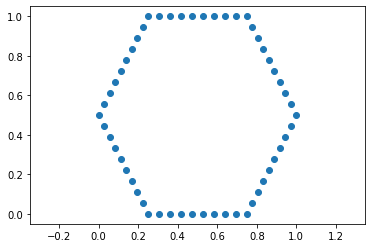

In [20]:
coords = compress(coords)
plot_motif(coords, types)

In [21]:
save(coords, types, "d_6", "d_6_hexagon.json")

# c1 - Random Pattern (asymmetric)

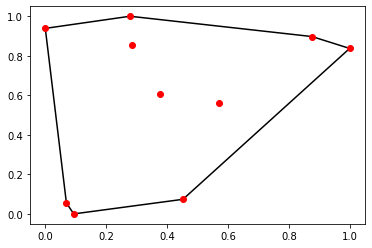

In [22]:
# Create a shape from a convex hull of random points

np.random.seed(0)
N = 10
coords = np.array(list(zip(np.random.random(N), np.random.random(N))))
types = ['A']*len(coords)

coords = compress(coords)

from scipy.spatial import ConvexHull
h = ConvexHull(coords)
for simplex in h.simplices:
    plt.plot(coords[simplex, 0], coords[simplex, 1], 'k-')
plt.plot(coords[:,0], coords[:,1], 'ro')

In [23]:
# Interpolate along vertices to densify the boundary
points = None
N = 5
for simplex in h.simplices:
    dx, dy = coords[simplex, 0], coords[simplex, 1]
    x = np.linspace(dx[0], dx[1], N)
    y = np.linspace(dy[0], dy[1], N)
    new_points = np.array(list(zip(x,y)))
    if points is None:
        points = new_points
    else:
        points = np.vstack((points, new_points))

In [24]:
coords = np.unique(points, axis=0)
types = ['A']*len(coords)

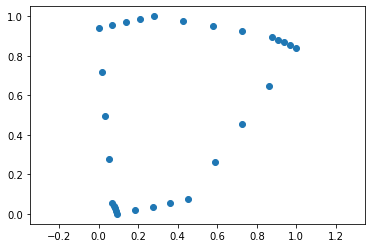

In [25]:
plot_motif(coords, types)

In [26]:
save(coords, types, "c_1", "c_1_random.json")

# c2 -

# c3 - 

# c4 - 

# c6 - 